# Importing
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
import keras
import numpy as np
import os
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import progressbar
import time

In [2]:
libraries = {
    'tensorflow': tf,
    'keras': keras,
    'numpy': np,
    'PIL (Pillow)': Image,
    'matplotlib': plt,
    'seaborn': sns,
    'sklearn': confusion_matrix,
    'progressbar': progressbar,
}

# Function to print library versions
def print_library_versions():
    for library_name, library_module in libraries.items():
        try:
            version = library_module.__version__
            print(f"{library_name}: {version}")
        except AttributeError:
            print(f"Unable to determine the version of {library_name}")

if __name__ == "__main__":
    print_library_versions()

tensorflow: 2.13.0
keras: 2.13.1
numpy: 1.23.5
PIL (Pillow): 9.4.0
Unable to determine the version of matplotlib
seaborn: 0.12.2
Unable to determine the version of sklearn
progressbar: 4.2.0


# Data Set

Training data: 5000 AI generated images and 5000 not AI generated images

Testing data: 3000 AI generated images and 3000 not AI generated images

---

# Preprocessing:

**rescale:** Scaling factor applied to the pixel values to normalize them between 0 and 1.

**rotation_range:** Range (in degrees) for random rotations applied to the image.

**width_shift_range:** Range (as a fraction of total width) for randomly shifting the image horizontally.

**height_shift_range:** Range (as a fraction of total height) for randomly shifting the image vertically.

**shear_range:** Range for applying shearing transformations to the image.

**zoom_range:** Range for applying random zooming to the image.

**horizontal_flip:** Boolean indicating whether to randomly flip images horizontally.

**fill_mode:** Strategy for filling in newly created pixels during transformations, with 'nearest' filling them with the nearest pixel's value.

---

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

# Data Generator (data selection from the specified directory)

---

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI PROJECT/DATA', # directory from where data will be loaded
    target_size=(224, 224), # The images will be resized to the dimensions specified here (224 pixels in width and 224 pixels in height)
    batch_size = 10, # during training, the generator will provide the model with batches of 10 images at a time
    class_mode='binary' # AI or Not AI
)

FileNotFoundError: ignored

# Creating The CNN model

---

In [ ]:
model = tf.keras.Sequential([
    # first convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    # max pooling layer with 2x2 pool size
    MaxPooling2D(2, 2),
    # second convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    # max pooling layer with 2x2 pool size
    MaxPooling2D(2, 2),
    # third convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
    Conv2D(128, (3, 3), activation='relu'),
    # max pooling layer with 2x2 pool size
    MaxPooling2D(2, 2),
    # flatten the output of the previous layer to a 1D vector
    Flatten(),
    # fully connected layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    # dropout layer to prevent overfitting (50% dropout)
    Dropout(0.5),
    # output layer with 1 neuron and sigmoid activation for binary classification
    Dense(1, activation='sigmoid') # if output < 0.5 than image is AI else not AI
])
# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training

---

In [ ]:
model.fit(train_generator, epochs=10, verbose=1)

# Saving the model

---

In [ ]:
model.save('/content/drive/MyDrive/AI PROJECT/-----name removed to prevent saving wrong model on same directory-----')

# Loading the saved model

---

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/AI Art Authenticator/SC1.h5')

## Testing the model

---

In [ ]:
def test(image_folder, true_label):

  image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
  total = len(image_files)
  # create a progress bar
  bar = progressbar.ProgressBar(max_value = total, prefix="Processing")
  progress = 0
  predicted_labels = []

  for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    new_image = Image.open(image_path)
    new_image = new_image.resize((224, 224))  # Resize to match the input size of the model
    new_image_array = np.array(new_image)
    new_image_array = np.expand_dims(new_image_array, axis=0)
    new_image_array = new_image_array / 255.0  # Normalize pixel values

    # Perform classification
    prediction = model.predict(new_image_array, verbose=0)

    if true_label == "AI": # if true label is AI
      if prediction[0][0] < 0.5:
        predicted_labels.append(1) # correct prediction
      else:
        predicted_labels.append(0) # wrong prediction

    if true_label == "nAI": # if actual label in not AI "nAI"

      if prediction[0][0] >= 0.5:
        predicted_labels.append(0) # correct prediction
      else:
        predicted_labels.append(1) # wrong prediction

    progress += 1
    bar.update(progress)  # Update the progress bar

  return predicted_labels

**0 = NON AI ART,
1 = AI ART**

Testing NON AI Art

In [ ]:
folderpath="/content/drive/MyDrive/AI Art Authenticator/images"
labelpred = test(folderpath, "nAI")

Processing  0% (0 of 1) |                | Elapsed Time: 0:00:00 ETA:  --:--:--

In [ ]:
print(labelpred)

[1]


Testing AI Art

In [ ]:
folderpath2="/content/drive/MyDrive/AI Art Authenticator/Test AI image"
labelpred2 = test(folderpath, "nAI")

Processing  0% (0 of 1) |                | Elapsed Time: 0:00:00 ETA:  --:--:--

In [ ]:
print(labelpred2)

[0]


In [ ]:
# testing
ai_test = '/content/drive/MyDrive/AI PROJECT/DATA/TEST/AI IMAGES'
non_ai_test = '/content/drive/MyDrive/AI PROJECT/DATA/TEST/NON AI IMAGES'
ai_predicted_labels = test(ai_test, "AI")
non_ai_predicted_labels = test(non_ai_test, "nAI")

Processing 99% (2999 of 3000) |######### | Elapsed Time: 0:03:56 ETA:   0:00:00

# Accuracy

---

In [ ]:
total_correct_predictions = ai_predicted_labels.count(1) + non_ai_predicted_labels.count(0) # adding the total correct predictions count
total_images = len(ai_predicted_labels) + len(non_ai_predicted_labels) # finding the total of images

print("accuracy = ", total_correct_predictions / total_images)

accuracy =  0.8795


# Confussion Matrix

---

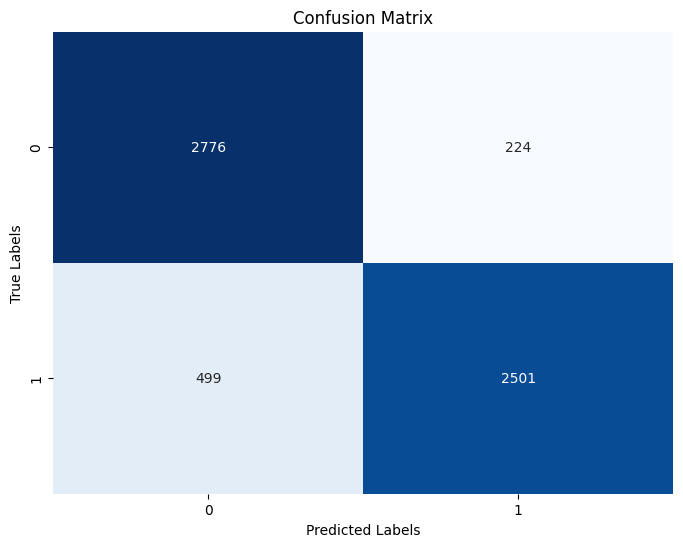

In [ ]:
predictions = np.array(ai_predicted_labels + non_ai_predicted_labels)
ground_truth = np.array([1 for _ in range(len(ai_predicted_labels))] + [0 for _ in range(len(non_ai_predicted_labels))]) #making array of actual labels
cm = confusion_matrix(ground_truth, predictions)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

---